In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.utils import to_categorical    
from keras.datasets import cifar10

from scripts.load_data import load_train, load_test

## CNN bouwen

In [4]:
# Het importeren en bewerken van de data 
train_images, train_labels = load_train()
test_images, test_labels = load_test()

# Normalizeren van de images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshapen van de images zodat ze de juiste dimensies hebben
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [10]:
# Onze CNN

# Stap 1: bepaal hoeveel filters je wilt, hoe groot je filter size moet zijn (let op je filter size mag niet te groot zijn vergeleken met je images), en wat je pool size is. 
num_filters = 20
filter_size = 3
pool_size = 2

# Stap 2: maak het model.
#    In de array die je aan sequential meegeeft, zet je alle layers die in het model moeten:
#    Conv2D, parameters: num_filters, filter_size, input_shape=(x, y, z)
#    MaxPooling2D, parameters: pool_size=pool_size
#    Flatten,
#    Dense, parameters: aantal outputs, activation='softmax'

shape = train_images.shape
model = Sequential([
    Conv2D(num_filters, (filter_size, filter_size), input_shape=(shape[1], shape[2], shape[3])),
    MaxPooling2D(pool_size=pool_size),
    Flatten(None),
    Dense(10, activation='softmax')
])

[[-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]]
(60000, 28, 31, 1)


In [11]:
# Stap 3: het compilen van het model. 
# model.compile parameters: 'adam', loss='categorial_crossentropy', metrics=['accuracy']
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Stap 4: fit het model. 
#    Data om op te trainen: train_images, to_categorial(train_labels)
#    epochs = 3
#    validation_data = test_images, to_categorial(test_labels)
model.fit(train_images, to_categorical(train_labels), epochs=3)
validation_data = test_images, to_categorical(test_labels)

(60000, 28, 31, 1) (60000,)
Epoch 1/3
  96/1875 [>.............................] - ETA: 14s - loss: 1.0756 - accuracy: 0.7031

KeyboardInterrupt: 

In [5]:
# Stap 5: evalueer het model
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels), verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8543 - accuracy: 0.7573 - 1s/epoch - 4ms/step
0.7573000192642212


In [55]:
# Stap 6: extra layer(s). Wat gebeurt er als je een extra Conv Layer toevoegd aan je model? 
#    Voeg een extra layer(s) toe en train het model opnieuw. 
# Onze CNN


num_filters = 40
filter_size = 4
pool_size = 2

shape = train_images.shape
model = Sequential([
    Conv2D(num_filters, (filter_size, filter_size), input_shape=(shape[1], shape[2], shape[3])),
    AveragePooling2D(pool_size=pool_size),
    MaxPooling2D(pool_size=pool_size),
    Flatten(None),
    Dense(10, activation='softmax')
])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, to_categorical(train_labels), epochs=3)
validation_data = test_images, to_categorical(test_labels)

test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels), verbose=2)
print(test_acc)


Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2924 - accuracy: 0.9144
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1124 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0839 - accuracy: 0.9744
313/313 - 2s - loss: 0.7860 - accuracy: 0.7601 - 2s/epoch - 7ms/step
0.7601000070571899


## CIFAR-10

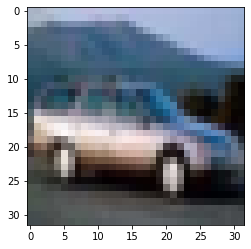

In [6]:
# Data inladen
(train_images10, train_labels10), (test_images10, test_labels10) = cifar10.load_data()

plt.imshow(train_images10[4])
plt.show()

# Normalizeren
train_images10, test_images10 = train_images10 / 255.0, test_images10 / 255.0

In [18]:
# Stap 8: bouw je eigen CNN voor de CIFAR-10 dataset. 
# Tip: gebruik meerdere Conv2D en MaxPooling layers
# LET OP: gebruik 'softmax' alleen bij je laatste Dense layer. Gebruik 'relu' voor de andere Conv2D/Dense layers. 

num_filters10 = 40
filter_size10 = 4

model_cif = Sequential([
    Conv2D(num_filters10, (filter_size10,filter_size10), input_shape=(train_images10.shape[1], train_images10.shape[2], train_images10.shape[3])),
    # Conv2D(num_filters10, filter_size10),
    # MaxPooling2D(pool_size=2),
    # MaxPooling2D(pool_size=2),
    MaxPooling2D(pool_size=2),
    Conv2D(num_filters10, filter_size10),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model_cif.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
model_cif.fit(
  train_images10,
  to_categorical(train_labels10),
  epochs= 4,
  validation_data=(test_images10, to_categorical(test_labels10)),
)

Epoch 1/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5991 - accuracy: 0.4344 - val_loss: 1.4397 - val_accuracy: 0.4962
Epoch 2/4
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2883 - accuracy: 0.5527 - val_loss: 1.2357 - val_accuracy: 0.5712
Epoch 3/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1740 - accuracy: 0.5930 - val_loss: 1.2119 - val_accuracy: 0.5873
Epoch 4/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0981 - accuracy: 0.6187 - val_loss: 1.1911 - val_accuracy: 0.5929


In [20]:
test_loss, test_acc = model_cif.evaluate(test_images10,  to_categorical(test_labels10), verbose=2)

313/313 - 2s - loss: 1.1911 - accuracy: 0.5929 - 2s/epoch - 5ms/step


In [21]:
print(test_acc)

0.5928999781608582


## Bronnen
* https://victorzhou.com/blog/keras-cnn-tutorial/ Bezocht: 9/3/2020
* https://www.tensorflow.org/tutorials/images/cnn Bezocht: 13/3/2020